# Segmentasi Pelanggan Berdasarkan Pola Pembelian Menggunakan Algoritma Clustering

- NAMA : M NAUFAL ADRIAN PRATAMA PUTRA
- NIM : A11.2022.14188

## Ringkasan

Dalam bisnis, memahami perilaku pelanggan adalah kunci untuk meningkatkan kepuasan dan retensi pelanggan. Dengan melakukan segmentasi pelanggan, pengelola bisnis dapat mengetahui kelompok pelanggan berdasarkan pola pembelian mereka dan menargetkan setiap segmen dengan strategi pemasaran yang tepat. Eksperimen yang akan dilakukan ini akan menggunakan teknik clustering untuk mengelompokkan pelanggan berdasarkan metrik seperti total pembelian dan frekuensi transaksi.

## Permasalahan 

Bisnis sering mengalami kesulitan dalam memahami perilaku pelanggan secara mendalam, terutama karena data transaksi yang besar dan kompleks. Ketidakmampuan untuk mengidentifikasi perbedaan pola pembelian pelanggan dapat menyebabkan strategi pemasaran yang tidak efektif, rendahnya tingkat kepuasan, serta hilangnya peluang untuk meningkatkan retensi pelanggan dan nilai bisnis.

## Tujuan

Eksperimen ini bertujuan untuk membagi pelanggan ke dalam beberapa segmen berdasarkan pola pembelian mereka menggunakan teknik clustering. Dengan memahami segmen pelanggan yang paling bernilai, bisnis dapat merancang strategi pemasaran yang lebih personal dan efektif, meningkatkan kepuasan serta retensi pelanggan, sekaligus memaksimalkan pertumbuhan bisnis.

## Alur

1. **Studi Literatur**  
   - Mengumpulkan referensi terkait eksperimen atau project yang serupa  
2. **Data Preparation:**  
   - Mengecek missing value  
   - Mengisi missing value dengan rata-rata, atau menghapus record nya 
   - Mengonversi tanggal transaksi  
3. **Membuat Fitur**:  
   - **Recency**: Hari sejak transaksi terakhir.  
   - **Frequency**: Jumlah total transaksi per pelanggan.  
   - **Monetary**: Total uang yang dibelanjakan per pelanggan.  
4. **Modeling:**  
   - Memilih jumlah kluster yang optimal   
   - Menerapkan kluster pada data.  
5. **Visualisasi dan Analisis:**  
   - Memvisualisasikan hasil kluster dengan *scatter plot* atau diagram batang.  
   - Menganalisis karakteristik tiap kluster (misalnya, kluster mana yang memiliki pelanggan dengan nilai tertinggi?).

## Penjelasan Dataset, EDA dan Proses Features Dataset

### Penjelasan Dataset

Dataset yang digunakan adalah data transaksi retail online yang berisi informasi tentang faktur penjualan, kode produk, deskripsi produk, jumlah, harga satuan, ID pelanggan, dan negara. Dataset ini digunakan untuk melakukan segmentasi pelanggan berdasarkan pola pembelian mereka.

### EDA

- Memuat Dataset: Dataset dimuat menggunakan `pd.read_csv`
- informasi Data: Menggunakan `df.info()` untuk melihat informasi umum tentang dataset seperti jumlah baris, kolom, dan tipe data.
- Pembersihan Data
    - Menghapus baris yang tidak memiliki `CustomerID`
    - Mengonversi kolom `InvoiceDate` menjadi tipe datetime.
    - Menghapus transaksi dengan `Quantity <= 0` atau `UnitPrice <= 0`.
    - Membuat fitur tambahan `TotalPrice` yang merupakan hasil perkalian `Quantity` dan `UnitPrice`.

### Proses Features Dataset
- Recency: Mengukur waktu sejak transaksi terakhir pelanggan hingga tanggal referensi.
- Frequency: Menghitung jumlah transaksi unik yang dilakukan pelanggan.
- Monetary: Mengukur total nilai belanja pelanggan.
- Standarisasi Data: Data RFM distandarisasi menggunakan `StandardScaler` untuk memastikan fitur-fitur memiliki pengaruh yang sama dalam algoritma clustering.


## Proses Learning / Modeling

### Elbow
- Menggunakan Elbow untuk menentukan jumlah cluster optimal dengan melihat grafik hubungan jumlah cluster (k) terhadap nilai SSE (Sum of Squared Errors)

### K-Means Clustering

- Menerapkan algoritma K-Means dengan jumlah cluster optimal yang diperoleh dari metode Elbow.
- Menambahkan hasil clustering ke dalam dataset RFM.

## Diskusi Hasil dan Kesimpulan

- Hasil clustering menunjukkan bahwa pelanggan dapat dikelompokkan ke dalam beberapa segmen berdasarkan pola pembelian mereka.
- Setiap cluster memiliki karakteristik yang berbeda dalam hal recency, frequency, dan monetary.
- Visualisasi cluster membantu dalam memahami distribusi dan karakteristik masing-masing cluster

### Import lib

In [1]:
import pandas as pd
import datetime as dt

### Load dataset

In [2]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Cek informasi data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Preparation
- Menghapus baris tanpa CustomerID
- Konversi InvoiceDate menjadi tipe datetime
- Hapus transaksi dengan Quantity <= 0 atau UnitPrice <= 0
- Pembuatan fitur tambahan TotalPrice

In [4]:
# Menghapus baris yang tidak memiliki CustomerID
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
# Konversi InvoiceDate ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
# Buang transaksi yang tidak valid
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [7]:
# Buat fitur baru untuk total harga
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Membuat Fitur Recency, Frequency, dan Monetary

### Recency

Recency mengukur waktu sejak transaksi terakhir pelanggan hingga tanggal referensi.
Langkah:
- Tetapkan tanggal referensi sebagai hari setelah transaksi terakhir
- Hitung selisih hari antara tanggal referensi dan transaksi terakhir setiap pelanggan.

In [8]:
# Tetapkan tanggal referensi
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Hitung Recency
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days

### Frequency
Frequency adalah jumlah transaksi unik yang dilakukan pelanggan.
Langkah:
- Hitung jumlah faktur unik (InvoiceNo) per pelanggan.

In [9]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

### Monetary
Monetary mengukur total nilai belanja pelanggan.
Langkah:
- Kalikan Quantity dengan UnitPrice untuk setiap transaksi.
- Hitung total nilai belanja per pelanggan.

In [10]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

### Gabung ketiga fitur

In [11]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

rfm.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,326,1,77183.60
1,12347.0,2011-12-07 15:52:00,2,7,4310.00
2,12348.0,2011-09-25 13:13:00,75,4,1797.24
3,12349.0,2011-11-21 09:51:00,19,1,1757.55
4,12350.0,2011-02-02 16:01:00,310,1,334.40


## Tahapan Modeling

### Standarisasi Data RFM
- Data RFM biasanya memiliki skala yang berbeda (misalnya, Monetary bernilai jauh lebih besar dibanding Recency). Untuk memastikan fitur-fitur memiliki pengaruh yang sama dalam algoritma clustering, data perlu distandarisasi.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# show the scaled data
show_rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
show_rfm_scaled.head()

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


### Tentukan Jumlah Cluster dengan Metode Elbow

- Gunakan metode Elbow untuk menentukan jumlah cluster optimal. Hal ini dilakukan dengan melihat grafik hubungan jumlah cluster (k) terhadap nilai SSE (Sum of Squared Errors). Kode untuk melakukannya:

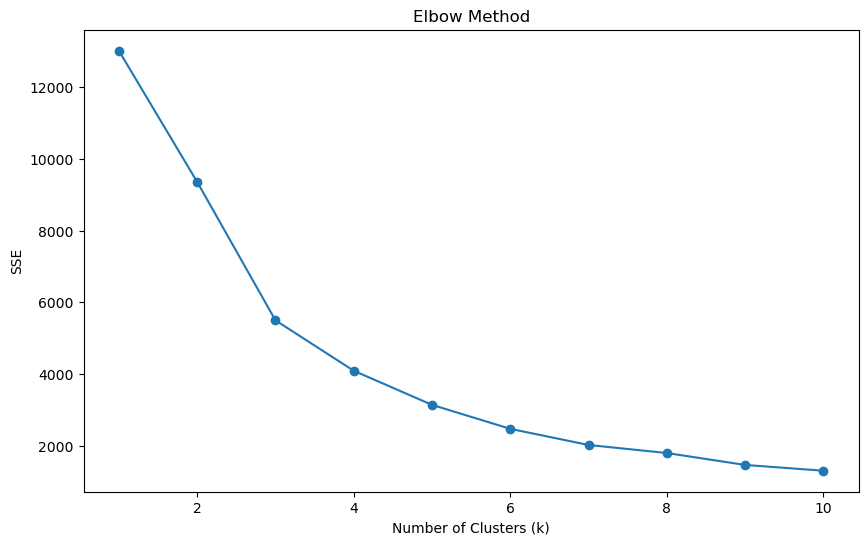

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):  # mencoba 1 hingga 10 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

### Menerapkan K-Means clusterig

In [14]:
# Terapkan K-Means dengan jumlah cluster optimal
optimal_clusters = 4  # ganti sesuai hasil Elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Lihat hasil clustering
print(rfm.head())


   CustomerID         InvoiceDate  Recency  Frequency  Monetary  Cluster
0     12346.0 2011-01-18 10:01:00      326          1  77183.60        3
1     12347.0 2011-12-07 15:52:00        2          7   4310.00        0
2     12348.0 2011-09-25 13:13:00       75          4   1797.24        0
3     12349.0 2011-11-21 09:51:00       19          1   1757.55        0
4     12350.0 2011-02-02 16:01:00      310          1    334.40        1


### Analisis Karatkeristik cluster

In [15]:
# Hitung rata-rata nilai RFM di setiap cluster
cluster_analysis = rfm.groupby('Cluster').mean()
print(cluster_analysis)


           CustomerID                   InvoiceDate     Recency  Frequency  \
Cluster                                                                      
0        15289.128356 2011-10-27 07:26:34.656188672   43.702685   3.682711   
1        15347.791940 2011-04-05 22:57:46.223055360  248.075914   1.552015   
2        15435.000000 2011-12-02 21:04:55.384615424    7.384615  82.538462   
3        15212.857843 2011-11-24 14:01:51.764705792   15.500000  22.333333   

              Monetary  
Cluster                 
0          1359.049284  
1           480.617480  
2        127338.313846  
3         12709.090490  


### Visualisasi Cluster

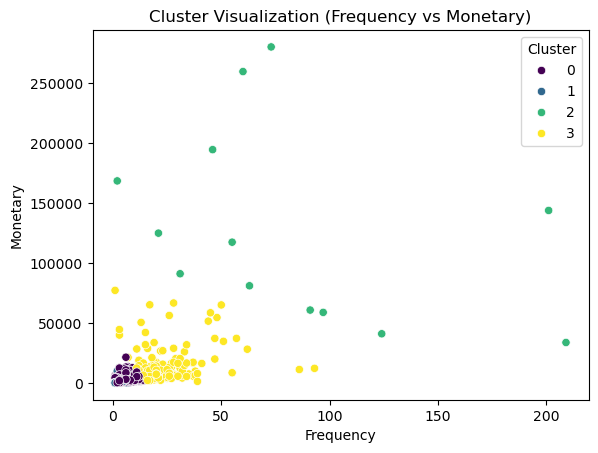

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Frequency vs Monetary dengan cluster
sns.scatterplot(
    x=rfm['Frequency'], 
    y=rfm['Monetary'], 
    hue=rfm['Cluster'], 
    palette='viridis'
)
plt.title('Cluster Visualization (Frequency vs Monetary)')
plt.show()